In [ ]:
conda activate TFgpu

<div align="center">
  <img src="DisplayIMG/Cartoon.png" alt="Image Description" />
</div>

In [ ]:
num_cores = os.cpu_count()  # Get number of CPU cores
num_cores_to_use = num_cores // 2  # Use half of the cores

num_cores

In [ ]:
num_cores_to_use

In [3]:
import cv2
import os
import numpy as np
from PIL import Image
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import glob
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from keras_tuner import BayesianOptimization, HyperParameters
import pickle
import cv2
import os
import numpy as np
from PIL import Image
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import glob
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from keras_tuner import HyperParameters
import cv2
import os
import numpy as np
from PIL import Image
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import glob
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from keras_tuner import BayesianOptimization, HyperParameters
import pickle


In [ ]:


# Get the current directory
current_directory = os.getcwd()

# Specify the folder name where the images are located
folder_name = "img"

# Construct the folder path
folder_path = os.path.join(current_directory, folder_name)

# Specify the CSV file path containing image labels
csv_file_path = os.path.join(current_directory, "labels", "english-clean.csv")

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Create a dictionary where keys are filenames and values are labels
labels_dict = df.set_index('image')['label'].to_dict()

def load_images_from_folder(folder, labels_dict):
    images = []
    labels = []
    for file_path in glob.glob(os.path.join(folder, "*.png")):
        img = Image.open(file_path)
        if img is not None:
            img = img.convert('L')  # Convert image to grayscale
            img = img.resize((64, 64))  # Resize the image
            np_img = np.array(img)
            images.append(np_img)
            filename = os.path.basename(file_path)
            label = labels_dict[filename]  # Get the label from the filename
            labels.append(label)
    return images, labels

images, labels = load_images_from_folder(folder_path, labels_dict)

le = preprocessing.LabelEncoder()
numerical_labels = le.fit_transform(labels)  # Convert labels to integers

images = np.array(images)  # Convert list of arrays to a single array
images = images / 255.0  # Normalize pixel values
images = images.reshape(-1, 64, 64, 1)  # Reshape array for CNN

encoded_labels = to_categorical(numerical_labels)  # One-hot encode labels

X_train, X_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.2, random_state=42, shuffle=True)

# Data augmentation for training data
datagen = ImageDataGenerator(
    rotation_range=35,  # Rotate images randomly by 20 degrees
    width_shift_range=0.1,  # Shift images horizontally by 10% of the width
    height_shift_range=0.1,  # Shift images vertically by 10% of the height
    shear_range=0.0,  # Apply shear transformation with a shear intensity of 0.2
    zoom_range=0.1,  # Apply zoom transformation with a zoom range of 0.2
    horizontal_flip=False,  # Flip images horizontally
    vertical_flip=False  # Do not flip images vertically
)

datagen.fit(X_train)

tuner = BayesianOptimization(
    build_model,  # The function to construct the model
    objective='val_accuracy',  # The metric to be optimized
    max_trials=50,  # The maximum number of iterations for tuning
    executions_per_trial=2,  # The number of models that should be built and fit for each trial for robustness purposes
    directory=os.path.normpath('C:/keras_tuning'),  # The path to the directory where the search results are stored
    project_name='keras_tuner_demo',  # The name of the project. This will be the name of the subdirectory under `directory` where the results are saved
    overwrite=True  # Whether or not to overwrite the project if it already exists
)

tuner.search_space_summary()

tuner.search(
    X_train,  # Training data
    y_train,  # Training labels
    epochs=200,  # The number of epochs for training
    validation_data=(X_test, y_test),  # Validation data
    callbacks=[early_stopping, model_checkpoint]  # Callbacks to be used during training
)

tuner.results_summary()

# Save the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters()[0]
with open('best_hyperparameters.pkl', 'wb') as file:
    pickle.dump(best_hyperparameters.values, file)


Epoch 1/45
85/85 [==============================] - 7s 69ms/step - loss: 4.8715 - accuracy: 0.0389 - val_loss: 4.1229 - val_accuracy: 0.0161
Epoch 2/45
85/85 [==============================] - 5s 64ms/step - loss: 4.1214 - accuracy: 0.0579 - val_loss: 4.1963 - val_accuracy: 0.0147
Epoch 3/45
85/85 [==============================] - 6s 65ms/step - loss: 3.9784 - accuracy: 0.0738 - val_loss: 4.3198 - val_accuracy: 0.0220
Epoch 4/45
85/85 [==============================] - 6s 65ms/step - loss: 3.8333 - accuracy: 0.0898 - val_loss: 4.1237 - val_accuracy: 0.0616
Epoch 5/45
85/85 [==============================] - 5s 64ms/step - loss: 3.6495 - accuracy: 0.1280 - val_loss: 4.3203 - val_accuracy: 0.0748
Epoch 6/45
85/85 [==============================] - 6s 66ms/step - loss: 3.5224 - accuracy: 0.1554 - val_loss: 3.3443 - val_accuracy: 0.1598
Epoch 7/45
85/85 [==============================] - 6s 66ms/step - loss: 3.2922 - accuracy: 0.1881 - val_loss: 3.3325 - val_accuracy: 0.1584
Epoch 8/45
85

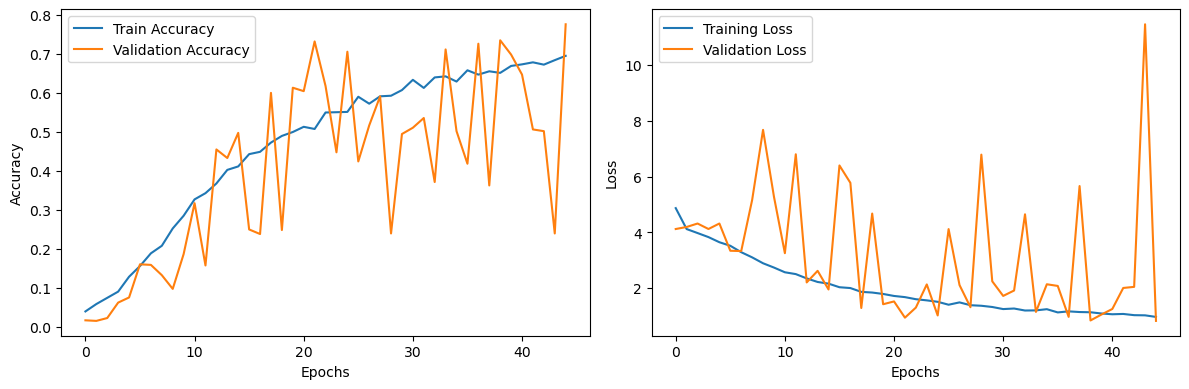

22/22 [==============================] - 0s 17ms/step
              precision    recall  f1-score   support

           0       0.69      0.64      0.67        14
           1       0.71      0.45      0.56        11
           2       1.00      0.80      0.89        10
           3       0.95      1.00      0.98        20
           4       0.87      0.93      0.90        14
           5       0.78      0.88      0.82        16
           6       0.90      1.00      0.95         9
           7       0.93      0.93      0.93        15
           8       1.00      0.33      0.50        12
           9       0.89      0.73      0.80        11
           A       1.00      0.94      0.97        16
           B       0.44      0.89      0.59         9
           C       0.88      0.78      0.82         9
           D       0.77      1.00      0.87        10
           E       1.00      0.93      0.97        15
           F       1.00      0.93      0.96        14
           G       1.00    

In [64]:

# Get the current directory
current_directory = os.getcwd()

# Specify the folder name where the images are located
folder_name = "img"

# Construct the folder path
folder_path = os.path.join(current_directory, folder_name)

# Specify the CSV file path containing image labels
csv_file_path = os.path.join(current_directory, "labels", "english-clean.csv")

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Create a dictionary where keys are filenames and values are labels
labels_dict = df.set_index('image')['label'].to_dict()

def load_images_from_folder(folder, labels_dict):
    images = []
    labels = []
    for file_path in glob.glob(os.path.join(folder, "*.png")):
        img = Image.open(file_path)
        if img is not None:
            img = img.convert('L')  # Convert image to grayscale
            img = img.resize((64, 64))  # Resize the image
            np_img = np.array(img)
            images.append(np_img)
            filename = os.path.basename(file_path)
            label = labels_dict[filename]  # Get the label from the filename
            labels.append(label)
    return images, labels

images, labels = load_images_from_folder(folder_path, labels_dict)

le = preprocessing.LabelEncoder()
numerical_labels = le.fit_transform(labels)  # Convert labels to integers

images = np.array(images)  # Convert list of arrays to a single array
images = images / 255.0  # Normalize pixel values
images = images.reshape(-1, 64, 64, 1)  # Reshape array for CNN

encoded_labels = to_categorical(numerical_labels)  # One-hot encode labels

X_train, X_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.2, random_state=42, shuffle=True)

# Data augmentation for training data
datagen = ImageDataGenerator(
    rotation_range=35,  # Rotate images randomly by 20 degrees
    width_shift_range=0.1,  # Shift images horizontally by 10% of the width
    height_shift_range=0.1,  # Shift images vertically by 10% of the height
    shear_range=0.0,  # Apply shear transformation with a shear intensity of 0.2
    zoom_range=0.1,  # Apply zoom transformation with a zoom range of 0.2
    horizontal_flip=False,  # Flip images horizontally
    vertical_flip=False  # Do not flip images vertically
)

datagen.fit(X_train)

# Specify the file path to the saved hyperparameters
hyperparameters_file_path = 'best_hyperparameters.pkl'

# Load the saved hyperparameters
with open(hyperparameters_file_path, 'rb') as file:
    loaded_hyperparameters_dict = pickle.load(file)

# Create a new HyperParameters object and set the loaded hyperparameters
loaded_hyperparameters = HyperParameters()
loaded_hyperparameters.values = loaded_hyperparameters_dict

def build_model(hp):
    model = Sequential()

    # First block of convolutions
    model.add(Conv2D(loaded_hyperparameters.get('conv_1_units'),
                     (3, 3),
                     activation='relu',
                     input_shape=(64, 64, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(loaded_hyperparameters.get('dropout_1')))

    # Second block of convolutions
    model.add(Conv2D(loaded_hyperparameters.get('conv_2_units'),
                     (3, 3),
                     activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(loaded_hyperparameters.get('dropout_2')))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(loaded_hyperparameters.get('dense_1_units'), activation='relu'))
    model.add(Dropout(loaded_hyperparameters.get('dropout_3')))
    model.add(Dense(len(le.classes_), activation='softmax'))

    # Compile model
    model.compile(optimizer=Adam(loaded_hyperparameters.get('learning_rate')),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

early_stopping = EarlyStopping(monitor='val_loss', patience=1000)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Build and train the model with the loaded hyperparameters and augmented data
best_model = build_model(loaded_hyperparameters)
history = best_model.fit(datagen.flow(X_train, y_train),  # Use the augmented data generator for training data
                         steps_per_epoch=len(X_train) // 32,  # Adjust the steps per epoch based on augmented data size
                         epochs=45,
                         validation_data=(X_test, y_test),
                         callbacks=[early_stopping, model_checkpoint])

# Plotting the accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print a classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=le.classes_, zero_division=1))


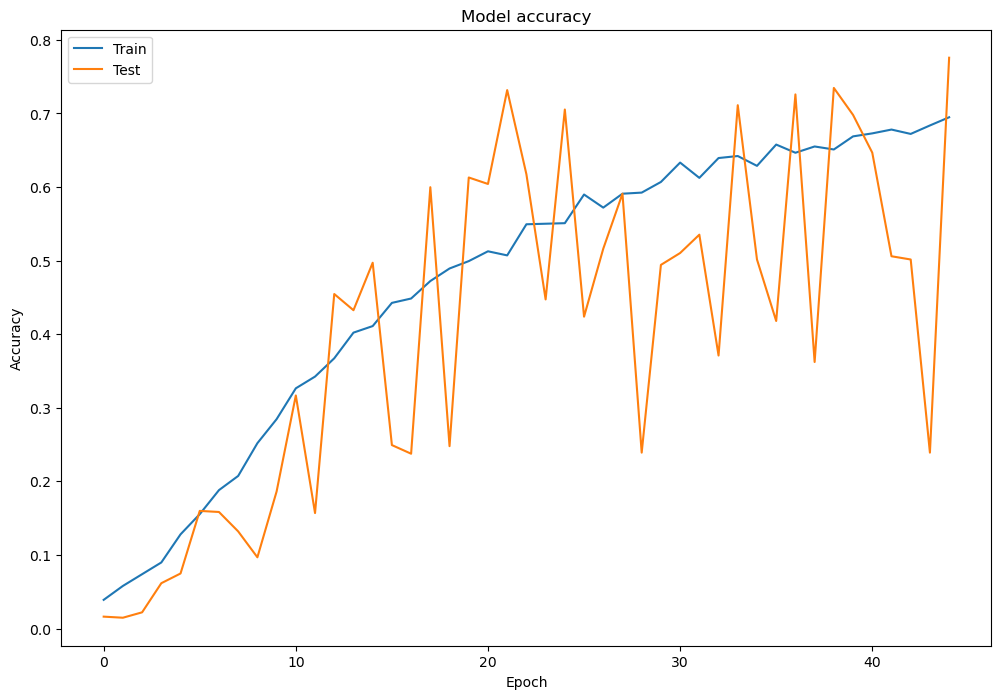

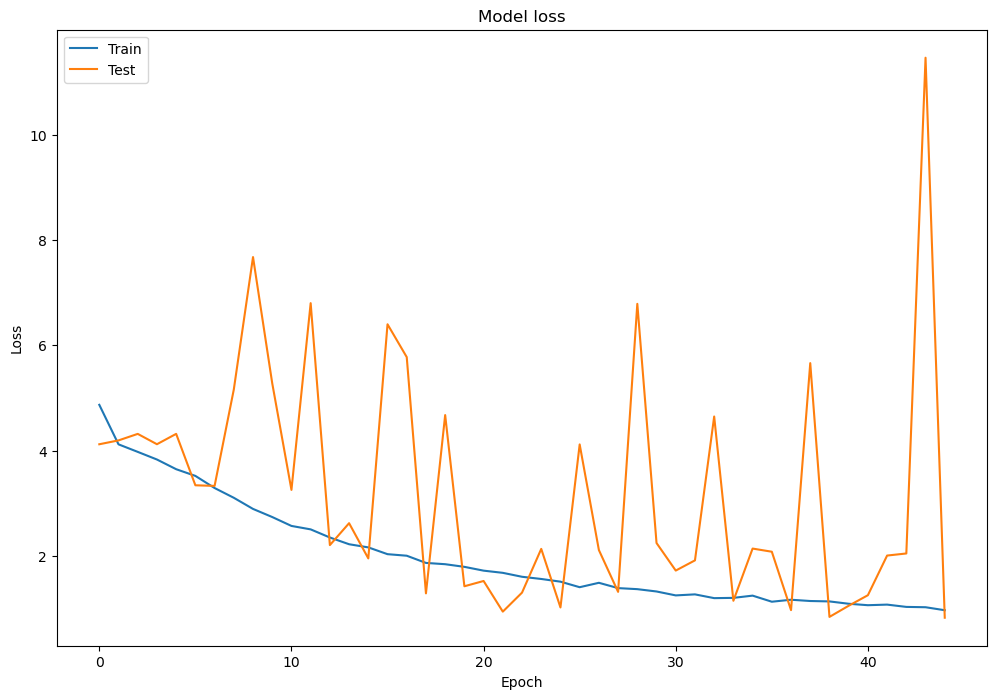

Evaluate on test data
6/6 [==============================] - 0s 57ms/step - loss: 0.8303 - accuracy: 0.7757
test loss, test accuracy: [0.8302889466285706, 0.7756597995758057]


In [65]:
# Plot training & validation accuracy values
plt.figure(figsize=[12,8])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=[12,8])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = best_model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test accuracy:", results)

In [66]:
# #Save Model For Furture Use
# model.save('EpochTenThousand')

In [67]:
# import pickle

# # Assume you have a history object from model.fit
# # history = model.fit(....)

# # Save it under some name
# with open('trainHistoryDict', 'wb') as file_pi:
#     pickle.dump(history.history, file_pi)


In [68]:
# with open('trainHistoryDict', 'rb') as file_pi:
#     loaded_history = pickle.load(file_pi)

In [74]:
# Evaluate the model on the training set
train_loss, train_accuracy = best_model.evaluate(X_train, y_train)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)

86/86 [==============================] - 2s 18ms/step - loss: 0.4298 - accuracy: 0.8581
Train Loss: 0.4298342764377594
Train Accuracy: 0.858137845993042


In [75]:
# Evaluate the model on the test set
loss, accuracy = best_model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels, zero_division=1))

# Print confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_true_labels, y_pred_labels)
print("Confusion Matrix:")
print(confusion_mtx)

22/22 [==============================] - 0s 17ms/step - loss: 0.8303 - accuracy: 0.7757
Test Loss: 0.8302888870239258
Test Accuracy: 0.7756597995758057
22/22 [==============================] - 0s 16ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.64      0.67        14
           1       0.71      0.45      0.56        11
           2       1.00      0.80      0.89        10
           3       0.95      1.00      0.98        20
           4       0.87      0.93      0.90        14
           5       0.78      0.88      0.82        16
           6       0.90      1.00      0.95         9
           7       0.93      0.93      0.93        15
           8       1.00      0.33      0.50        12
           9       0.89      0.73      0.80        11
          10       1.00      0.94      0.97        16
          11       0.44      0.89      0.59         9
          12       0.88      0.78      0.82         9
          13  

22/22 [==============================] - 0s 17ms/step


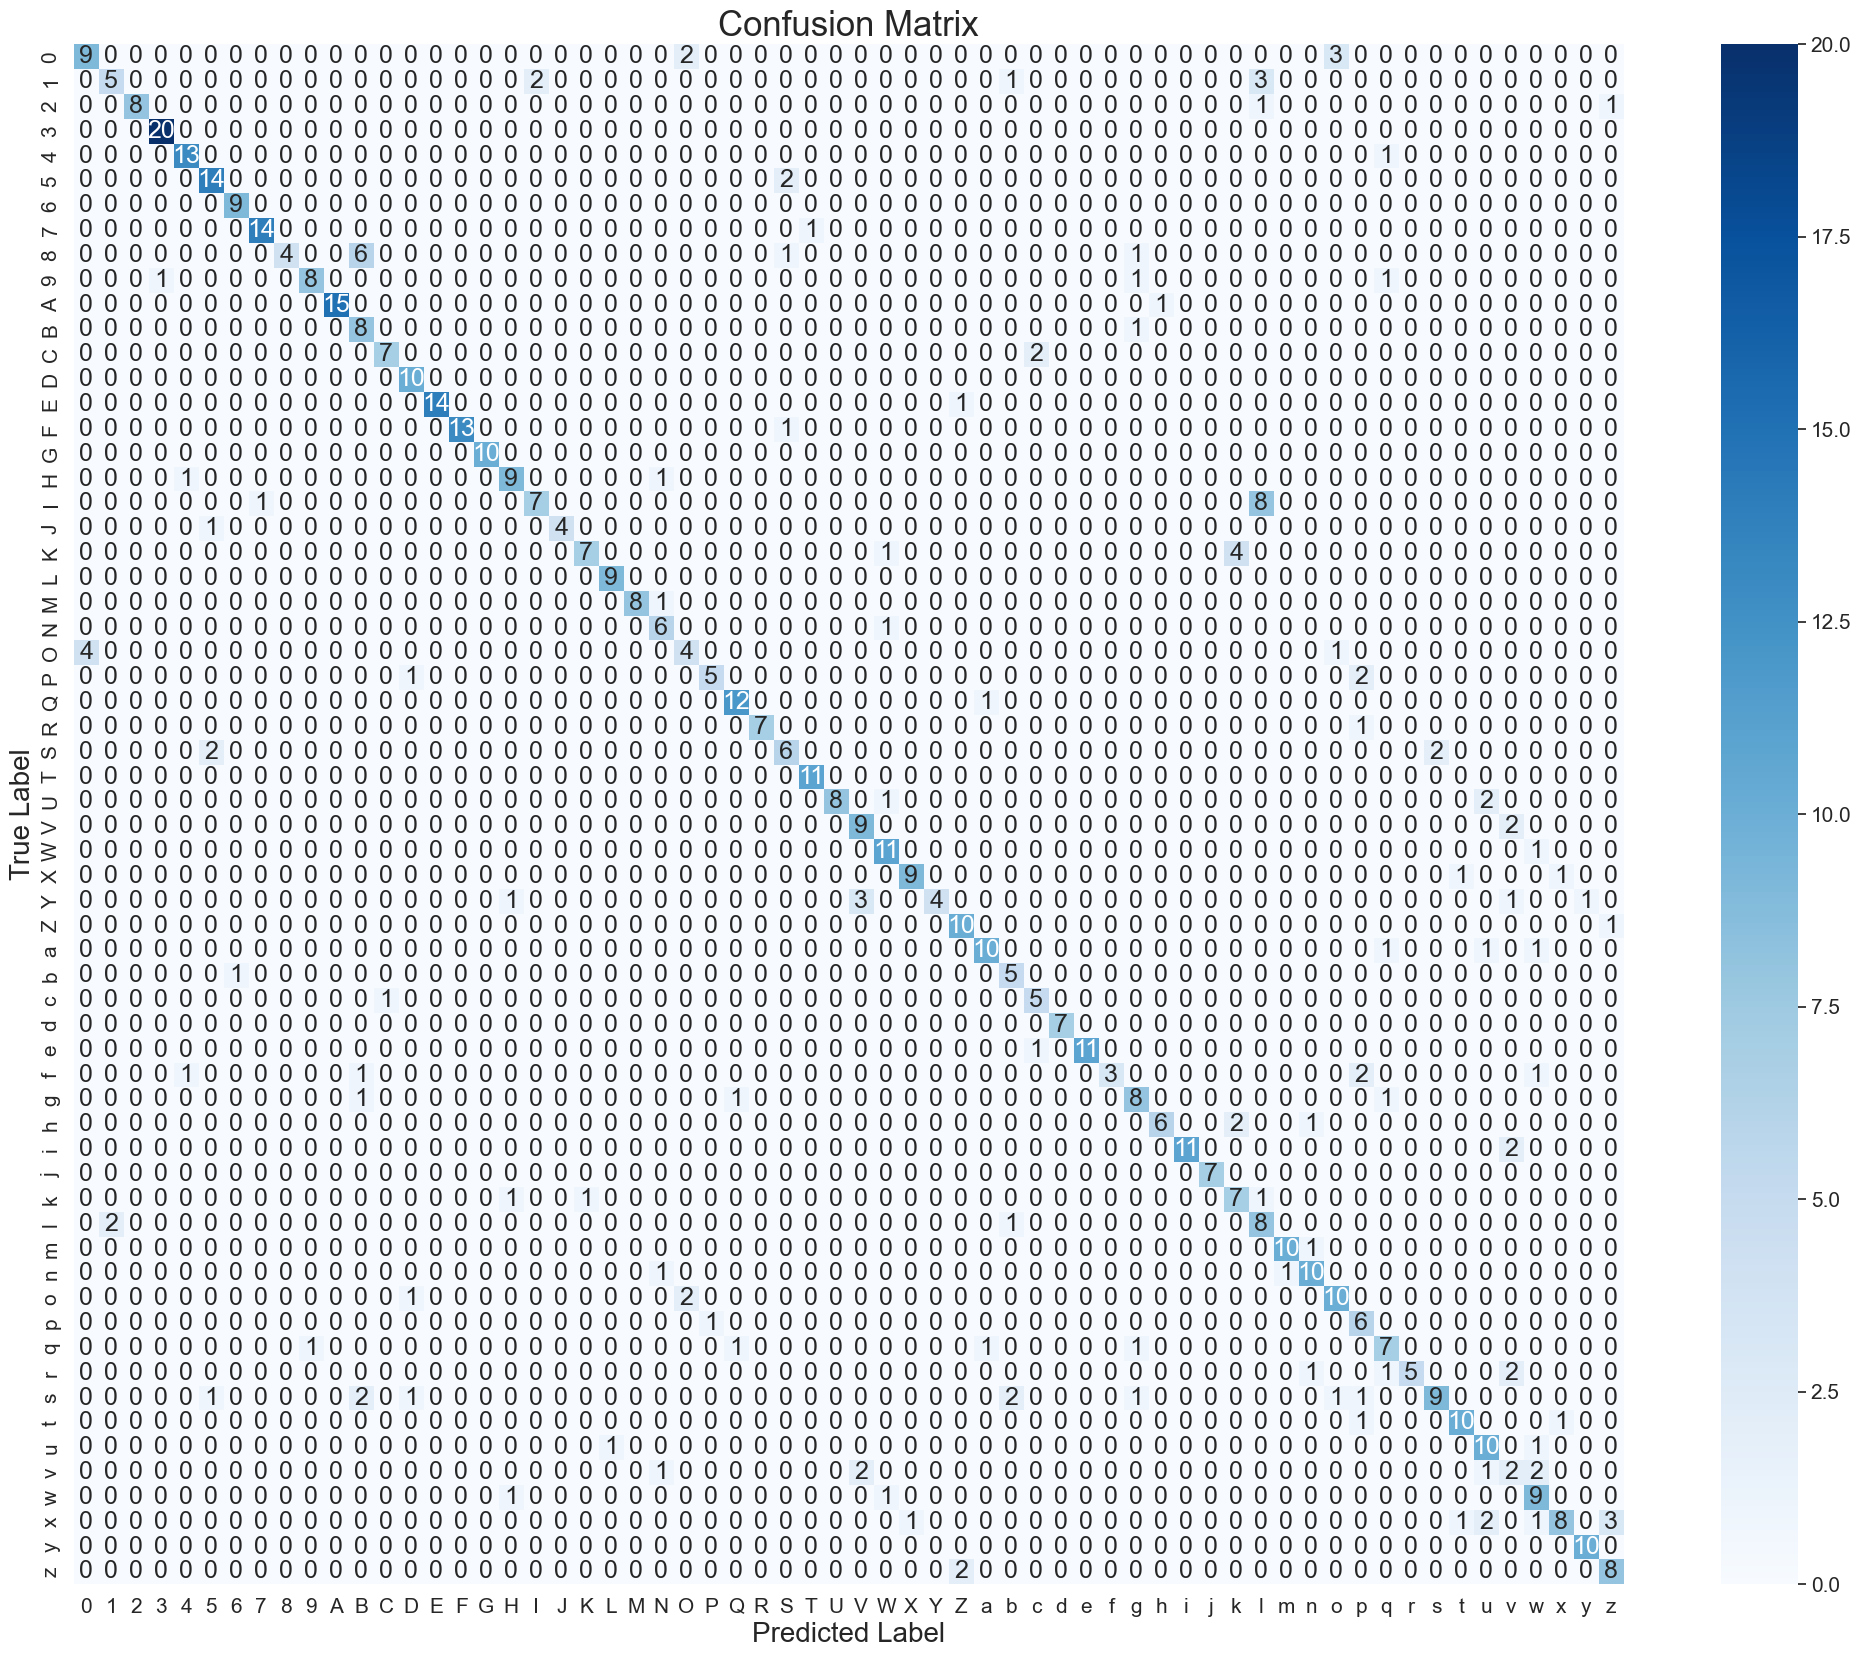

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Convert probabilities to labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Also convert the one-hot encoded labels back to label encoding
y_true_labels = np.argmax(y_test, axis=1)

# Convert numerical labels back to original labels
y_pred_labels = le.inverse_transform(y_pred_labels)
y_true_labels = le.inverse_transform(y_true_labels)

# Calculate confusion matrix
confusion_mtx = confusion_matrix(y_true_labels, y_pred_labels)

# Create a list of unique labels
labels = list(le.classes_)

# Set the font scale (this will affect heatmap annotation size)
sns.set(font_scale=1.5)

# Adjust size of labels, title using rcParams
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

# Visualize confusion matrix using seaborn's heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label', fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.title('Confusion Matrix', fontsize=25)
plt.show()


In [77]:
best_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 160)       1600      
                                                                 
 batch_normalization_4 (Batc  (None, 62, 62, 160)      640       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 160)      0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 31, 31, 160)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        92224     
                                                                 
 batch_normalization_5 (Batc  (None, 29, 29, 64)      

# Class Activation Maps (CAM):

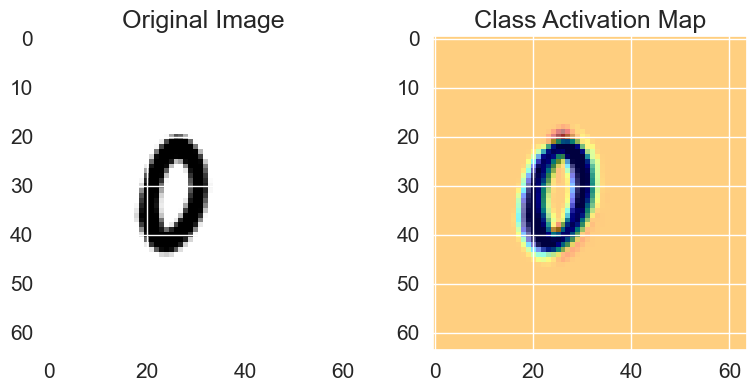

In [79]:
import numpy as np
import tensorflow.keras.backend as K

def visualize_cam(model, img):
    # Extract the last convolutional layer
    last_conv_layer = model.get_layer('conv2d_4')
    
    # Define a new model that outputs the last conv layer and the model's predicted class probabilities
    cam_model = tf.keras.Model(model.input, (last_conv_layer.output, model.output))
    
    # Calculate the gradients of the predicted class with respect to the output feature map of the last conv layer
    with tf.GradientTape() as tape:
        conv_outputs, predictions = cam_model(img)
        predicted_class = tf.argmax(predictions[0])
        gradient = tape.gradient(predictions[:, predicted_class], conv_outputs)
    
    # Compute the weights using global average pooling on the gradients
    weights = tf.reduce_mean(gradient[0], axis=(0, 1))
    
    # Get the feature map values and resize them to match the input image size
    feature_map = conv_outputs[0]
    cam = np.dot(feature_map, weights)
    cam = cv2.resize(cam, (img.shape[2], img.shape[1]))
    cam = np.maximum(cam, 0)
    cam = cam / np.max(cam)
    
    return cam


# Choose an image from the test set
test_image = X_test[4]

# Reshape the image to match the input shape of the model
test_image = np.reshape(test_image, (1, 64, 64, 1))

# Generate the CAM for the chosen image
cam = visualize_cam(best_model, test_image)

# Plot the original image and the CAM
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(test_image[0, :, :, 0], cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(test_image[0, :, :, 0], cmap='gray')
plt.imshow(cam, cmap='jet', alpha=0.5)
plt.title('Class Activation Map')

plt.tight_layout()
plt.show()


In [80]:
def visualize_cam(model, img):
    # Extract the last convolutional layer
    last_conv_layer = model.get_layer('conv2d_3')
    
    # Define a new model that outputs the last conv layer and the model's predicted class probabilities
    cam_model = tf.keras.Model(model.input, (last_conv_layer.output, model.output))
    
    # Calculate the gradients of the predicted class with respect to the output feature map of the last conv layer
    with tf.GradientTape() as tape:
        conv_outputs, predictions = cam_model(img)
        predicted_class = tf.argmax(predictions[0])
        gradient = tape.gradient(predictions[:, predicted_class], conv_outputs)
    
    # Compute the weights using global average pooling on the gradients
    weights = tf.reduce_mean(gradient[0], axis=(0, 1))
    
    # Get the feature map values and resize them to match the input image size
    feature_map = conv_outputs[0]
    cam = np.dot(feature_map, weights)
    cam = cv2.resize(cam, (img.shape[2], img.shape[1]))
    cam = np.maximum(cam, 0)
    cam = cam / np.max(cam)
    
    return cam


In [81]:
cam = visualize_cam(best_model, test_image)

# Plot the original image and the CAM
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(test_image[0, :, :, 0], cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(test_image[0, :, :, 0], cmap='gray')
plt.imshow(cam, cmap='jet', alpha=0.5)
plt.title('Class Activation Map')

plt.tight_layout()
plt.show()


ValueError: No such layer: conv2d_3. Existing layers are: ['conv2d_4', 'batch_normalization_4', 'max_pooling2d_4', 'dropout_6', 'conv2d_5', 'batch_normalization_5', 'max_pooling2d_5', 'dropout_7', 'flatten_2', 'dense_4', 'dropout_8', 'dense_5'].

In [ ]:
def visualize_cam(model, img):
    # Extract the last convolutional layer
    last_conv_layer = model.get_layer('conv2d_2')
    
    # Define a new model that outputs the last conv layer and the model's predicted class probabilities
    cam_model = tf.keras.Model(model.input, (last_conv_layer.output, model.output))
    
    # Reshape the input image to match the expected input shape of the model
    img = np.reshape(img, (1, 64, 64, 1))
    
    # Calculate the gradients of the predicted class with respect to the output feature map of the last conv layer
    with tf.GradientTape() as tape:
        conv_outputs, predictions = cam_model(img)
        predicted_class = tf.argmax(predictions[0])
        gradient = tape.gradient(predictions[:, predicted_class], conv_outputs)
    
    # Compute the weights using global average pooling on the gradients
    weights = tf.reduce_mean(gradient[0], axis=(0, 1))
    
    # Get the feature map values and resize them to match the input image size
    feature_map = conv_outputs[0]
    cam = np.dot(feature_map, weights)
    cam = cv2.resize(cam, (img.shape[2], img.shape[1]))
    cam = np.maximum(cam, 0)
    cam = cam / np.max(cam)
    
    return cam

cam = visualize_cam(best_model, test_image)

# Plot the original image and the CAM
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(test_image[0, :, :, 0], cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(test_image[0, :, :, 0], cmap='gray')
plt.imshow(cam, cmap='jet', alpha=0.5)
plt.title('Class Activation Map')

plt.tight_layout()
plt.show()


# Class Activation Maps (CAM) of First Layer

In [ ]:
def visualize_cam(model, img):
    # Extract the last convolutional layer
    last_conv_layer = model.get_layer('conv2d_2')
    
    # Define a new model that outputs the last conv layer and the model's predicted class probabilities
    cam_model = tf.keras.Model(model.input, (last_conv_layer.output, model.output))
    
    # Reshape the input image to match the expected input shape of the model
    img = np.reshape(img, (-1, 64, 64, 1))
    
    # Calculate the gradients of the predicted class with respect to the output feature map of the last conv layer
    with tf.GradientTape() as tape:
        conv_outputs, predictions = cam_model(img)
        predicted_class = tf.argmax(predictions[0])
        gradient = tape.gradient(predictions[:, predicted_class], conv_outputs)
    
    # Compute the weights using global average pooling on the gradients
    weights = tf.reduce_mean(gradient[0], axis=(0, 1))
    
    # Get the feature map values and resize them to match the input image size
    feature_map = conv_outputs[0]
    cam = np.dot(feature_map, weights)
    cam = cv2.resize(cam, (img.shape[2], img.shape[1]))
    cam = np.maximum(cam, 0)
    cam = cam / np.max(cam)
    
    return cam



# Reshape the image to match the expected input shape of the model
test_image = np.reshape(test_image, (64, 64))
test_image = np.expand_dims(test_image, axis=-1)
test_image = np.expand_dims(test_image, axis=0)

cam = visualize_cam(best_model, test_image)

# Plot the original image and the CAM
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(test_image[0, :, :, 0], cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(test_image[0, :, :, 0], cmap='gray')
plt.imshow(cam, cmap='jet', alpha=0.5)
plt.title('Class Activation Map')

plt.tight_layout()
plt.show()


# Class Activation Maps (CAM) of 2nd Layer:

In [ ]:
import numpy as np
import tensorflow.keras.backend as K

def visualize_cam(model, img):
    # Extract the last convolutional layer
    last_conv_layer = model.get_layer('conv2d_3')
    
    # Define a new model that outputs the last conv layer and the model's predicted class probabilities
    cam_model = tf.keras.Model(model.input, (last_conv_layer.output, model.output))
    
    # Calculate the gradients of the predicted class with respect to the output feature map of the last conv layer
    with tf.GradientTape() as tape:
        conv_outputs, predictions = cam_model(img)
        predicted_class = tf.argmax(predictions[0])
        gradient = tape.gradient(predictions[:, predicted_class], conv_outputs)
    
    # Compute the weights using global average pooling on the gradients
    weights = tf.reduce_mean(gradient[0], axis=(0, 1))
    
    # Get the feature map values and resize them to match the input image size
    feature_map = conv_outputs[0]
    cam = np.dot(feature_map, weights)
    cam = cv2.resize(cam, (img.shape[2], img.shape[1]))
    cam = np.maximum(cam, 0)
    cam = cam / np.max(cam)
    
    return cam


# Choose an image from the test set
test_image = X_test[3]

# Reshape the image to match the input shape of the model
test_image = np.reshape(test_image, (1, 64, 64, 1))

# Generate the CAM for the chosen image
cam = visualize_cam(best_model, test_image)

# Plot the original image and the CAM
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(test_image[0, :, :, 0], cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(test_image[0, :, :, 0], cmap='gray')
plt.imshow(cam, cmap='jet', alpha=0.5)
plt.title('Class Activation Map')

plt.tight_layout()
plt.show()


# Grad-CAM:

In [ ]:
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tf_explain.core.grad_cam import GradCAM

# def image_to_uint_255(image):
#     if isinstance(image, np.ndarray):
#         if image.dtype == np.uint8:
#             return image
#         if image.min() < 0:
#             image = (image + 1.0) / 2.0
#         return (image * 255).astype("uint8")
#     elif isinstance(image, tf.Tensor):
#         if tf.reduce_min(image) < 0:
#             image = (image + 1.0) / 2.0
#         return (image * 255).numpy().astype("uint8")
#     else:
#         raise ValueError("Unsupported image type. Expected NumPy array or TensorFlow tensor.")



# # Load the best model
# best_model = tf.keras.models.load_model('best_model.h5')

# # Choose an image from the test set to generate Grad-CAM
# image_index = 0
# input_image = X_test[image_index]

# # Preprocess the input image
# preprocessed_image = tf.expand_dims(input_image, axis=0)

# # Create a GradCAM instance
# explainer = GradCAM()

# # Generate Grad-CAM for the predicted class
# class_index = np.argmax(best_model.predict(preprocessed_image), axis=1)[0]
# grid = explainer.explain(validation_data=(preprocessed_image, None), model=best_model, layer_name="conv2d_3", class_index=class_index)

# # Rescale the grid for visualization
# grid = cv2.resize(grid[0], (input_image.shape[1], input_image.shape[0]))

# # Overlay the original image with the Grad-CAM grid
# heatmap = cv2.applyColorMap(np.uint8(255 * grid), cv2.COLORMAP_JET)
# output_image = cv2.addWeighted(cv2.cvtColor((input_image * 255).astype(np.uint8), cv2.COLOR_GRAY2BGR), 0.5, heatmap, 0.5, 0)

# # Visualize the original image and Grad-CAM
# plt.figure(figsize=(10, 6))
# plt.subplot(1, 2, 1)
# plt.imshow((input_image * 255).astype(np.uint8), cmap='gray')
# plt.title('Original Image')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(output_image[:, :, ::-1])
# plt.title('Grad-CAM')
# plt.axis('off')

# plt.tight_layout()
# plt.show()


# Feature Maps:

1/1 [==============================] - 0s 49ms/step


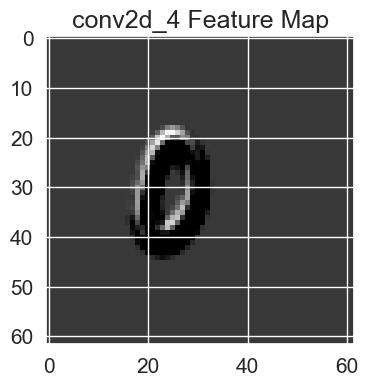

In [82]:
def visualize_feature_maps(model, img):
    # Extract the intermediate feature maps
    layer_outputs = [layer.output for layer in model.layers if 'conv2d' in layer.name]
    activation_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)
    feature_maps = activation_model.predict(img)
    
    # Plot the feature maps
    for layer, feature_map in zip(model.layers, feature_maps):
        if 'conv2d' in layer.name:
            plt.figure(figsize=(8, 4))
            plt.imshow(feature_map[0, :, :, 0], cmap='gray')
            plt.title(layer.name + ' Feature Map')
            plt.show()

# Visualize the feature maps for the chosen image
visualize_feature_maps(best_model, test_image)


# Filter Visualization:

In [83]:
def visualize_filters(model, layer_name):
    layer = model.get_layer(layer_name)
    filters, _ = layer.get_weights()

    if filters.ndim == 4:
        filters = np.moveaxis(filters, -1, 0)

    num_filters = filters.shape[0]
    num_rows = (num_filters + 7) // 8
    plt.figure(figsize=(12, num_rows * 1.5))

    for i, filter_ in enumerate(filters):
        plt.subplot(num_rows, 8, i+1)
        plt.imshow(filter_, cmap='gray')
        plt.axis('off')

    plt.suptitle(layer_name + ' Filters')
    plt.tight_layout()
    plt.show()



# Load the best model
best_model = tf.keras.models.load_model('best_model.h5')

# Visualize the filters of the first convolutional layer
visualize_filters(best_model, 'conv2d_2')


ValueError: No such layer: conv2d_2. Existing layers are: ['conv2d_4', 'batch_normalization_4', 'max_pooling2d_4', 'dropout_6', 'conv2d_5', 'batch_normalization_5', 'max_pooling2d_5', 'dropout_7', 'flatten_2', 'dense_4', 'dropout_8', 'dense_5'].

# Activation Histograms:

In [ ]:
def plot_activation_histograms(model, img):
    activation_model = tf.keras.Model(inputs=model.input,
                                      outputs=[layer.output for layer in model.layers if 'conv2d' in layer.name])
    activations = activation_model.predict(img)

    plt.figure(figsize=(12, 6))
    for i, activation in enumerate(activations):
        if 'conv2d_2' in model.layers[i].name:
            plt.subplot(2, 4, i+1)
            plt.hist(activation.flatten(), bins=50)
            plt.title(model.layers[i].name + ' Activation')
            plt.xlabel('Activation Value')
            plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Plot the activation histograms for the chosen image
plot_activation_histograms(best_model, test_image)


# Learning Curves:

In [ ]:
# Plotting the accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Hyperparameter Optimization:

In [ ]:
# Load the results of hyperparameter optimization
results = pd.read_csv('hyperparameter_results.csv')

# Plot the accuracy and loss values for different hyperparameter settings
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(results['learning_rate'], results['accuracy'], 'o-')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(results['learning_rate'], results['loss'], 'o-')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


# Model Architecture Visualization:

In [ ]:
# Plotting the accuracy and loss
plt.figure(figsize=(12, 4))

# ... (existing code)

plt.tight_layout()
plt.show()

# Visualize the model architecture
plot_model(best_model, to_file='model_architecture.png', show_shapes=True)

# Embedding Visualization:

In [ ]:
import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Extract the embeddings from the model
embedding_model = tf.keras.Model(inputs=best_model.input,
                                 outputs=best_model.get_layer('conv2d_2').output)
embeddings = embedding_model.predict(X_test)

# Reshape the embeddings array to have two dimensions
reshaped_embeddings = embeddings.reshape(embeddings.shape[0], -1)

# Standardize the embeddings
scaler = StandardScaler()
scaled_embeddings = scaler.fit_transform(reshaped_embeddings)

# Reduce the dimensionality of the embeddings using t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(scaled_embeddings)

# Plot the embeddings
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=y_true_classes)
plt.colorbar()
plt.title('Embedding Visualization')
plt.show()
